In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!gdown 18QuoyuqmNKmR9mba5he4ojPc4KzkIs3t

Downloading...
From: https://drive.google.com/uc?id=18QuoyuqmNKmR9mba5he4ojPc4KzkIs3t
To: C:\Users\Acer\train-cars24-car-price.csv

  0%|          | 0.00/1.25M [00:00<?, ?B/s]
 42%|####1     | 524k/1.25M [00:00<00:00, 2.96MB/s]
100%|##########| 1.25M/1.25M [00:00<00:00, 5.73MB/s]


### Overview

In [3]:
df = pd.read_csv("train-cars24-car-price.csv")
df.head()

,full_name,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti SX4 Zxi BSIII,2.85,2007.0,Individual,110000,Petrol,Manual,15.00,1586.0,104.68,5.0
1,Hyundai i20 Sportz 1.4 CRDi,4.70,2012.0,Dealer,70000,Diesel,Manual,21.90,1396.0,88.76,5.0
2,Maruti Swift VDI BSIV,5.25,2015.0,Individual,70000,Diesel,Manual,25.20,1248.0,74.00,5.0
3,Honda City 1.3 EXI,1.25,2005.0,Individual,90000,Petrol,Manual,13.00,1343.0,90.00,5.0
4,Volkswagen Polo 1.2 MPI Comfortline,4.65,2015.0,Dealer,41000,Petrol,Manual,16.47,1198.0,74.00,5.0


Notice that Variable full_name contains both Maker and Model information - need to extract make and model from full_name.

In [4]:
df.shape

(13986, 11)

In [5]:
df.info

<bound method DataFrame.info of                                   full_name  selling_price    year  \
0                      Maruti SX4 Zxi BSIII           2.85  2007.0   
1               Hyundai i20 Sportz 1.4 CRDi           4.70  2012.0   
2                     Maruti Swift VDI BSIV           5.25  2015.0   
3                        Honda City 1.3 EXI           1.25  2005.0   
4       Volkswagen Polo 1.2 MPI Comfortline           4.65  2015.0   
...                                     ...            ...     ...   
13981                      Maruti XL6 Alpha          10.40  2019.0   
13982  Mahindra KUV100 NXT G80 K8 5Str BSIV           5.50  2018.0   
13983            Nissan Terrano XL D Option           5.51  2015.0   
13984                   Mahindra Bolero SLE           5.40  2011.0   
13985    Maruti Swift Dzire VXI AT Optional           6.30  2018.0   

      seller_type  km_driven fuel_type transmission_type  mileage  engine  \
0      Individual     110000    Petrol            

In [6]:
display(df.describe())

,selling_price,year,km_driven,mileage,engine,max_power,seats
count,13986.000000,13986.000000,1.398600e+04,13986.000000,13986.000000,13986.000000,13986.000000
mean,7.377749,2014.516088,5.797629e+04,19.356221,1473.574905,97.685631,5.313242
std,9.368596,3.256795,5.378180e+04,4.638576,518.289204,45.067944,0.831653
min,0.325000,1991.000000,1.000000e+02,0.000000,0.000000,5.000000,2.000000
25%,3.400000,2013.000000,3.100000e+04,16.840000,1197.000000,73.900000,5.000000
50%,5.100000,2015.000000,5.120000e+04,19.160000,1248.000000,86.700000,5.000000
75%,7.800000,2017.000000,7.397800e+04,22.320000,1582.000000,112.000000,5.000000
max,395.000000,2021.000000,3.800000e+06,120.000000,6752.000000,626.000000,14.000000


- selling_price ranges from [0.33, 395] - the values seem to be in lakhs.
- mileage min is 0, max is 120 - need to check for outliers.
- engine min is 0, max is 6752 - values appear to be in "cc" - need to check for outliers.

### Distributions

Lets check the distributions of these features one by one

In [7]:
df.head()

,full_name,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti SX4 Zxi BSIII,2.85,2007.0,Individual,110000,Petrol,Manual,15.00,1586.0,104.68,5.0
1,Hyundai i20 Sportz 1.4 CRDi,4.70,2012.0,Dealer,70000,Diesel,Manual,21.90,1396.0,88.76,5.0
2,Maruti Swift VDI BSIV,5.25,2015.0,Individual,70000,Diesel,Manual,25.20,1248.0,74.00,5.0
3,Honda City 1.3 EXI,1.25,2005.0,Individual,90000,Petrol,Manual,13.00,1343.0,90.00,5.0
4,Volkswagen Polo 1.2 MPI Comfortline,4.65,2015.0,Dealer,41000,Petrol,Manual,16.47,1198.0,74.00,5.0


<AxesSubplot:>

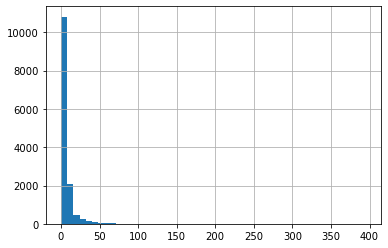

In [8]:
df['selling_price'].hist(bins=50)

Lets check the percntage of outliers. We are manually taking a call that price over a 100 (K) is an outlier by looking at the above plot

In [9]:
(df.loc[df['selling_price'] > 100].shape[0] / df.shape[0])*100

0.06435006435006435

In [10]:
df.loc[df['selling_price'] > 100]

,full_name,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats
670,Mercedes-Benz S-Class S 450,110.0,2019.0,Dealer,18000,Petrol,Automatic,7.81,2996.0,362.07,5.0
1125,Bentley Mulsanne 6.8,235.0,2012.0,Dealer,15000,Petrol,Automatic,10.10,6752.0,505.00,5.0
3174,Mercedes-Benz S-Class S 500,110.0,2016.0,Dealer,41000,Petrol,Automatic,7.81,5461.0,362.90,5.0
3968,Lamborghini Gallardo Spyder,150.0,2013.0,Dealer,4000,Petrol,Automatic,6.40,5204.0,560.00,2.0
4940,Ferrari GTC4Lusso T,395.0,2019.0,Dealer,3800,Petrol,Automatic,4.00,3855.0,601.00,4.0
5348,Jaguar XJ 50 Special Edition,110.0,2019.0,Individual,5400,Diesel,Automatic,14.47,2993.0,301.73,5.0
5450,Rolls-Royce Ghost Series II Extended Wheelbase,242.0,2017.0,Individual,5000,Petrol,Automatic,10.20,6592.0,563.00,4.0
11110,Porsche Cayenne GTS,111.0,2017.0,Dealer,24000,Petrol,Automatic,12.50,3604.0,440.00,5.0
13595,Bentley Continental GT Speed Convertible BSIV,145.0,2012.0,Dealer,9000,Petrol,Automatic,9.50,5998.0,626.00,4.0


Lets saturate selling price at 100.

In [11]:
df.loc[df['selling_price'] > 100 , 'selling_price' ] = 100

<AxesSubplot:>

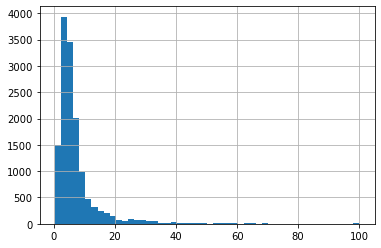

In [12]:
df['selling_price'].hist(bins=50)

- Can you think of an automated way of deciding this threshold 100 ? Seems like we made this decision arbitarily
- Hint: use quantiles 

### Outliers and Missing Values
-Q: Which plot(s) is/are suitable for outlier visualisation ?

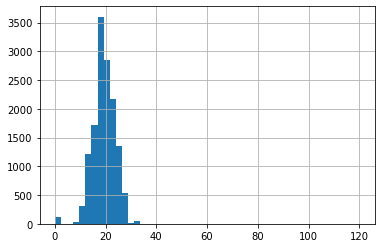

In [13]:
df["mileage"].hist(bins=50);

Another useful plot is called the 'density' plot. Which is also similar to histogram, but with a more approximate shape. It tries to fit a suitable distribution over the histogram and hence includes points that might not even be present in data at hand.

<AxesSubplot:ylabel='Density'>

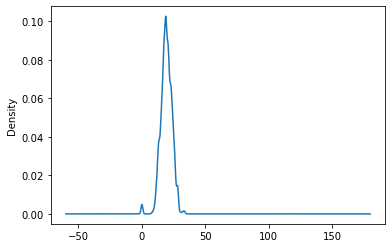

In [14]:
df['mileage'].plot.density()

- We observe a skewed plot with right tail to long. An interesting point here would be mileage > 40, because after that it looks like the values mught just be outliers.

- Above we saw that there was an unusual peak at 0. Lets investigate further. Looking at points where mileage is less than 5

In [15]:
df[df['mileage'] <= 5].mileage.describe()

count    119.000000
mean       0.033613
std        0.366679
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        4.000000
Name: mileage, dtype: float64

Looks like we just have a number of points with mileage 0. That does not make much sense as it cannot be a real value for car mileage. Investigating mileage=0 cases

In [16]:
(df[df['mileage'] == 0].shape[0] / df.shape[0])*100

0.8437008437008438

In [17]:
df[df['mileage'] == 0].shape

(118, 11)

Thats a very small number of points. We can safely impute, or drop these points later during pre-processing

### Are the top values errorneous?

Above we had also noticed that there was a significant point at mileage=40. After this there were only very few points and looked like outliers. Lets check them

In [18]:
df[df['mileage'] > 40].mileage.describe()

count      3.000000
mean     116.666667
std        5.773503
min      110.000000
25%      115.000000
50%      120.000000
75%      120.000000
max      120.000000
Name: mileage, dtype: float64

In [19]:
df[df['mileage'] > 40]

,full_name,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats
4291,Mahindra e2o Premium,3.25,2013.0,Individual,50000,Electric,Automatic,120.0,0.000000,25.5,5.0
4751,Mahindra e2o T2,3.60,2015.0,Dealer,42862,Electric,Automatic,120.0,0.000000,25.5,5.0
4894,Mahindra e2oPlus P6,4.00,2018.0,Dealer,26000,Electric,Automatic,110.0,1476.327401,25.4,4.0


In [20]:
df[df['mileage'] > 40].fuel_type.value_counts()

Electric    3
Name: fuel_type, dtype: int64

- So all vehicles with mileage > 40 are electric vehicles which makes sense.
- So they are not incorrect (error) values.
- Let us not remove these points for now

### Correlations

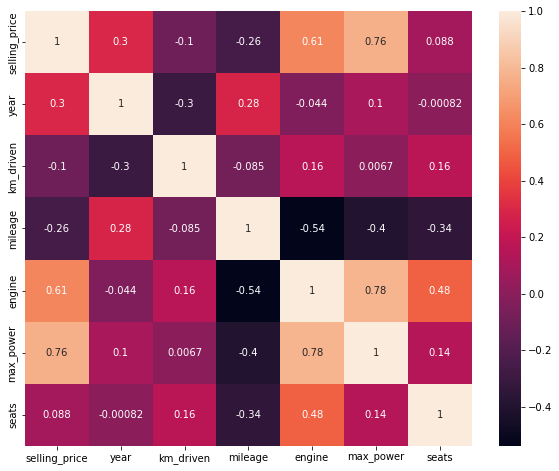

In [21]:
plt.figure(figsize = (10,8))
ax = sns.heatmap(df.corr(), annot = True)

We see the following correlations:

- Engine and max-power
- Max power and selling price Now based on our domain knowledge (about cars) we can digest these correlations. In this case, these correlations seem to make a lot of sense
- Another visualisation we can check, is the scatter plot of each feature with the target. This can be easily done using pairplot from seaborn library

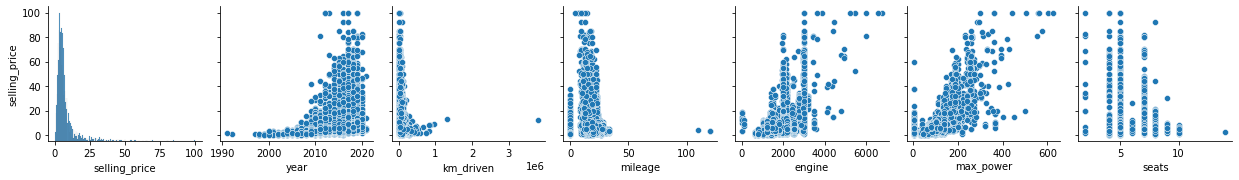

In [22]:
sns.pairplot(df, y_vars=["selling_price"])

In [23]:
df['seats'].value_counts(normalize=True)

5.0     0.837123
7.0     0.115902
8.0     0.022237
4.0     0.011440
6.0     0.007293
9.0     0.003432
10.0    0.001502
2.0     0.001001
14.0    0.000072
Name: seats, dtype: float64

### Categorical Variables

#### How can we extract Make and Model from "full_name"

We have noticed that the name contains the informaiton of the brand and the model. Lets extract those and create new features from them. After that we can drop the original column

In [24]:
df.head()

,full_name,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti SX4 Zxi BSIII,2.85,2007.0,Individual,110000,Petrol,Manual,15.00,1586.0,104.68,5.0
1,Hyundai i20 Sportz 1.4 CRDi,4.70,2012.0,Dealer,70000,Diesel,Manual,21.90,1396.0,88.76,5.0
2,Maruti Swift VDI BSIV,5.25,2015.0,Individual,70000,Diesel,Manual,25.20,1248.0,74.00,5.0
3,Honda City 1.3 EXI,1.25,2005.0,Individual,90000,Petrol,Manual,13.00,1343.0,90.00,5.0
4,Volkswagen Polo 1.2 MPI Comfortline,4.65,2015.0,Dealer,41000,Petrol,Manual,16.47,1198.0,74.00,5.0


In [25]:
df['make'] = df['full_name'].apply(lambda x: x.split()[0])

In [26]:
df['model'] = df['full_name'].apply(lambda x: ' '.join(x.split()[1:]))

In [27]:
df = df.drop('full_name' , axis = 1)
df.head()

,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,make,model
0,2.85,2007.0,Individual,110000,Petrol,Manual,15.00,1586.0,104.68,5.0,Maruti,SX4 Zxi BSIII
1,4.70,2012.0,Dealer,70000,Diesel,Manual,21.90,1396.0,88.76,5.0,Hyundai,i20 Sportz 1.4 CRDi
2,5.25,2015.0,Individual,70000,Diesel,Manual,25.20,1248.0,74.00,5.0,Maruti,Swift VDI BSIV
3,1.25,2005.0,Individual,90000,Petrol,Manual,13.00,1343.0,90.00,5.0,Honda,City 1.3 EXI
4,4.65,2015.0,Dealer,41000,Petrol,Manual,16.47,1198.0,74.00,5.0,Volkswagen,Polo 1.2 MPI Comfortline


#### Catergirical 

Now let us look at some categorical variables one by one

In [28]:
df.describe(include = 'object')

,seller_type,fuel_type,transmission_type,make,model
count,13986,13986,13986,13986,13986
unique,3,5,2,41,2923
top,Dealer,Petrol,Manual,Maruti,Alto 800 LXI
freq,8393,6870,11251,3979,143


In [29]:
df['seller_type'].value_counts()

Dealer              8393
Individual          5450
Trustmark Dealer     143
Name: seller_type, dtype: int64

In [30]:
df['fuel_type'].value_counts()

Petrol      6870
Diesel      6823
CNG          233
LPG           49
Electric      11
Name: fuel_type, dtype: int64

In [31]:
df['transmission_type'].value_counts()

Manual       11251
Automatic     2735
Name: transmission_type, dtype: int64

#### Does selling price vary in some of these groups

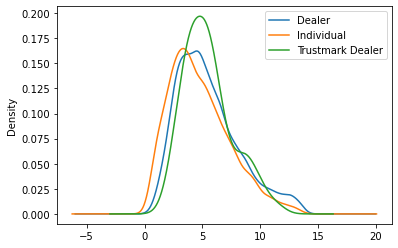

In [32]:
df.loc[df.selling_price<=df.selling_price.quantile(0.9)].groupby('seller_type')['selling_price'].plot.density() 
plt.legend()

Looks like for different seller type, the selling price distrubution is not very different. Hence one intuition that can be developed from this plot is that the seller_type variable will not turn out to be very important for the ML model. (We will check this later)

Lets check for all groups?
Another way to visualise the same is to use a plot known as box-plot

Note: Although, seats is numeric, but we will consider it as an ordinal variable and perform similar analysis as we do for other categorical variables.

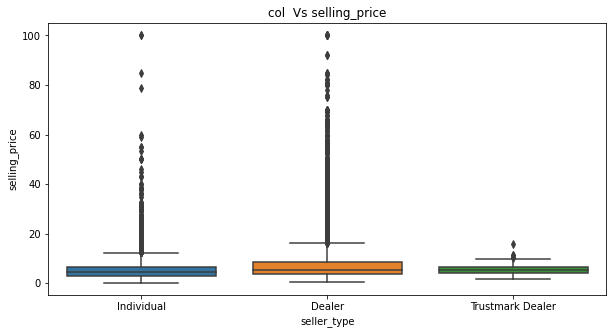

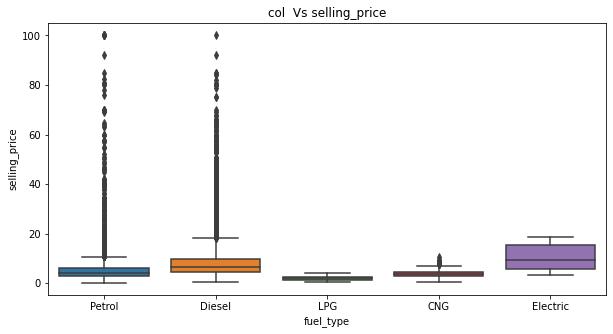

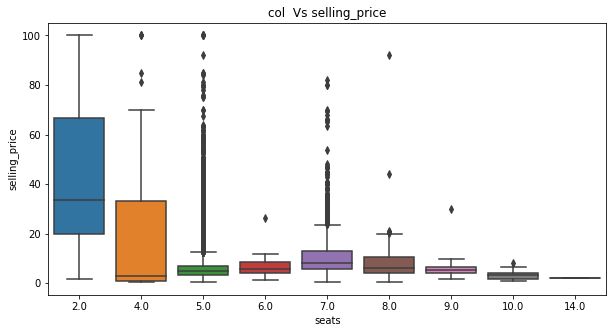

In [33]:
for col in ['seller_type' , 'fuel_type' , 'seats']:
    plt.figure(figsize = (10,5))
    sns.boxplot(y = 'selling_price', x = col, data = df)
    plt.title('col  Vs selling_price')
    plt.show()

How can we transform the scale of selling-price for better visualisation?

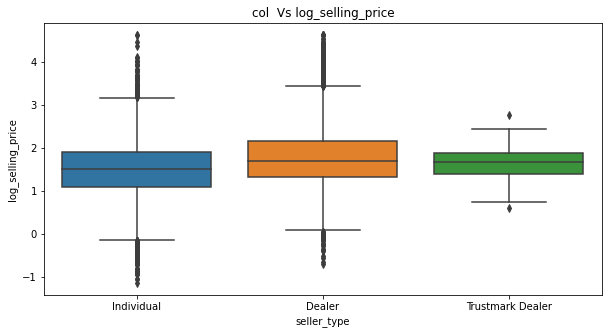

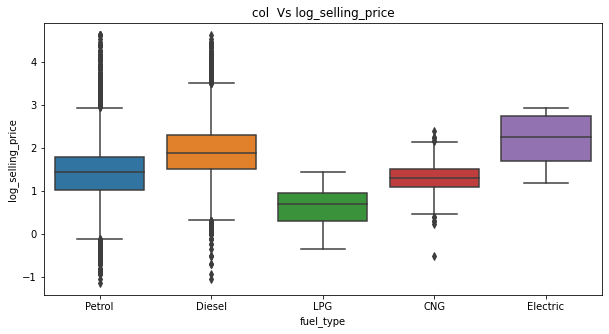

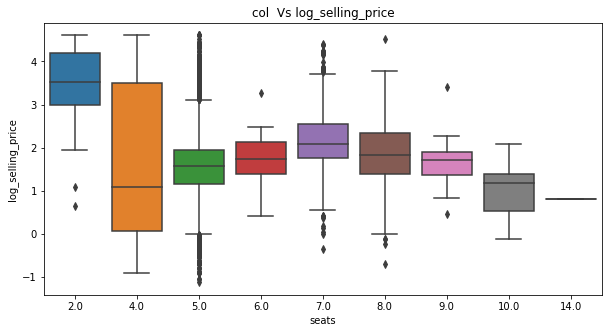

In [34]:
df['log_selling_price'] = np.log(df['selling_price'].values)
for col in ['seller_type' , 'fuel_type' , 'seats']:
    plt.figure(figsize = (10,5))
    sns.boxplot(y = 'log_selling_price', x = col, data = df)
    plt.title('col  Vs log_selling_price')
    plt.show()

selling_price of "coupe" is quite variational - important to be kept for predictive modelling

#### How many categories of "make" in the data?

In [35]:
len(df['make'].unique())

41

There are 41 car brands in the data - too many levels, think of possible ways to encode them as numbers

#### What are item counts for different "make"?

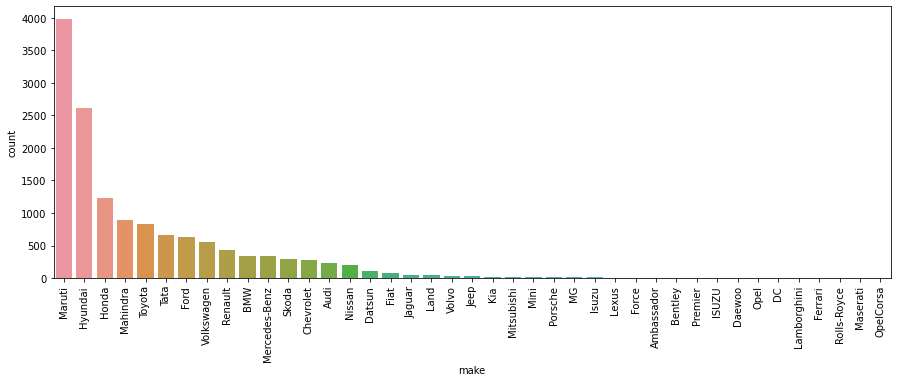

In [36]:
plt.figure(figsize = (15,5))
sns.countplot(x = 'make' , order = df['make'].value_counts().index , data = df)
plt.xticks(rotation = 90)
plt.show()

#### How is "make" related to the selling price?

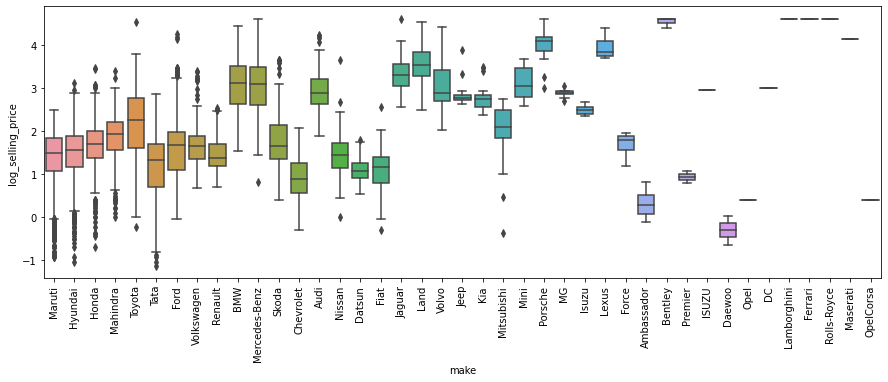

In [37]:
plt.figure(figsize = (15,5))
sns.boxplot(x = 'make' , y = 'log_selling_price', order = df['make'].value_counts().index , data = df)
plt.xticks(rotation = 90)
plt.show()

In [38]:
df.drop('log_selling_price' , axis = 1 , inplace = True)

- How should we treat number of seats? Continuous OR Categorical ?
    - Answer:
        - Number of seats is a variable with a finite discrete set of values. However it is orderd. If we make it categorical, it would be fed into the model as unordered.
        - But we need to think do we want that order? Example 2 seater cars are most likely more expensive than other cars. So in this sense 2 > 5. We actually would benefit from discarding the order.
- Can you convert number of seats to a variable which has 9 unique values with 3 categories?
    - Hint: Merge some elements. Eg all cars with > 5 seats are on category.
- Can we do something similar with the "make variable"

### Feature Engineering

In [39]:
df.head()

,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,make,model
0,2.85,2007.0,Individual,110000,Petrol,Manual,15.00,1586.0,104.68,5.0,Maruti,SX4 Zxi BSIII
1,4.70,2012.0,Dealer,70000,Diesel,Manual,21.90,1396.0,88.76,5.0,Hyundai,i20 Sportz 1.4 CRDi
2,5.25,2015.0,Individual,70000,Diesel,Manual,25.20,1248.0,74.00,5.0,Maruti,Swift VDI BSIV
3,1.25,2005.0,Individual,90000,Petrol,Manual,13.00,1343.0,90.00,5.0,Honda,City 1.3 EXI
4,4.65,2015.0,Dealer,41000,Petrol,Manual,16.47,1198.0,74.00,5.0,Volkswagen,Polo 1.2 MPI Comfortline


#### 1. Year
Sometimes it is good practice to convert the features into the way we actually understand. This will not necessarily help the model, but helps in us in understanding / interpreting predictions little better

So lets convert year to more readable age

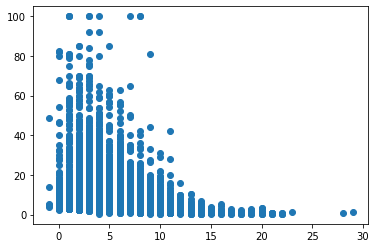

In [40]:
current_year = 2020 
age = current_year - df['year']
plt.scatter(age , df['selling_price'])

Higher selling price for newer cars !!



#### 2. Categorical Encoding (transmission type)
- Q: How do we encode categorical variables for modelling?
- 2.1 transmission_type (2 categories)

In [41]:
df[df['transmission_type']== 'Automatic'] 

,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,make,model
8,21.00,2016.0,Dealer,75000,Petrol,Automatic,19.16,2487.0,214.50,5.0,Toyota,Camry Hybrid 2.5
9,11.00,2013.0,Individual,103142,Diesel,Automatic,15.73,1968.0,174.33,5.0,Audi,Q3 2.0 TDI
11,13.50,2016.0,Dealer,186000,Diesel,Automatic,11.36,2755.0,171.50,7.0,Toyota,Innova Crysta 2016-2020 2.8 GX AT BSIV
16,22.00,2016.0,Individual,80000,Diesel,Automatic,10.91,3198.0,197.00,7.0,Ford,Endeavour 3.2 Titanium AT 4X4
17,11.00,2019.0,Individual,6500,Petrol,Automatic,18.15,998.0,118.35,5.0,Hyundai,Venue SX Plus Turbo DCT BSIV
...,...,...,...,...,...,...,...,...,...,...,...,...
13967,7.00,2011.0,Dealer,98000,Diesel,Automatic,14.21,2143.0,203.00,5.0,Mercedes-Benz,E-Class E250 CDI Elegance
13972,9.00,2017.0,Individual,25000,Petrol,Automatic,14.28,1798.0,138.03,5.0,Toyota,Corolla Altis 1.8 G CVT
13973,17.95,2014.0,Dealer,67400,Diesel,Automatic,12.55,2982.0,168.50,7.0,Toyota,Fortuner 4x2 AT
13976,4.75,2011.0,Individual,230000,Diesel,Automatic,11.79,2179.0,120.00,8.0,Mahindra,Scorpio VLS AT 2.2 mHAWK


In [42]:
df['transmission_type'].value_counts()

Manual       11251
Automatic     2735
Name: transmission_type, dtype: int64

In [43]:
transmission_dummies = pd.get_dummies(df['transmission_type'])
df = pd.concat([df,transmission_dummies],axis = 1)
df = df.drop(["transmission_type", "Automatic"], axis=1) #dropping the automatic and old trans,mission cols

In [44]:
df

,selling_price,year,seller_type,km_driven,fuel_type,mileage,engine,max_power,seats,make,model,Manual
0,2.85,2007.0,Individual,110000,Petrol,15.00,1586.0,104.68,5.0,Maruti,SX4 Zxi BSIII,1
1,4.70,2012.0,Dealer,70000,Diesel,21.90,1396.0,88.76,5.0,Hyundai,i20 Sportz 1.4 CRDi,1
2,5.25,2015.0,Individual,70000,Diesel,25.20,1248.0,74.00,5.0,Maruti,Swift VDI BSIV,1
3,1.25,2005.0,Individual,90000,Petrol,13.00,1343.0,90.00,5.0,Honda,City 1.3 EXI,1
4,4.65,2015.0,Dealer,41000,Petrol,16.47,1198.0,74.00,5.0,Volkswagen,Polo 1.2 MPI Comfortline,1
...,...,...,...,...,...,...,...,...,...,...,...,...
13981,10.40,2019.0,Individual,4500,Petrol,19.01,1462.0,103.20,6.0,Maruti,XL6 Alpha,1
13982,5.50,2018.0,Individual,17000,Petrol,18.15,1198.0,82.00,5.0,Mahindra,KUV100 NXT G80 K8 5Str BSIV,1
13983,5.51,2015.0,Dealer,45665,Diesel,19.87,1461.0,83.14,5.0,Nissan,Terrano XL D Option,1
13984,5.40,2011.0,Dealer,106000,Diesel,13.60,2523.0,63.00,7.0,Mahindra,Bolero SLE,1


In [45]:
df = df.rename(columns = {'Manual':'transmission_type'})
df

,selling_price,year,seller_type,km_driven,fuel_type,mileage,engine,max_power,seats,make,model,transmission_type
0,2.85,2007.0,Individual,110000,Petrol,15.00,1586.0,104.68,5.0,Maruti,SX4 Zxi BSIII,1
1,4.70,2012.0,Dealer,70000,Diesel,21.90,1396.0,88.76,5.0,Hyundai,i20 Sportz 1.4 CRDi,1
2,5.25,2015.0,Individual,70000,Diesel,25.20,1248.0,74.00,5.0,Maruti,Swift VDI BSIV,1
3,1.25,2005.0,Individual,90000,Petrol,13.00,1343.0,90.00,5.0,Honda,City 1.3 EXI,1
4,4.65,2015.0,Dealer,41000,Petrol,16.47,1198.0,74.00,5.0,Volkswagen,Polo 1.2 MPI Comfortline,1
...,...,...,...,...,...,...,...,...,...,...,...,...
13981,10.40,2019.0,Individual,4500,Petrol,19.01,1462.0,103.20,6.0,Maruti,XL6 Alpha,1
13982,5.50,2018.0,Individual,17000,Petrol,18.15,1198.0,82.00,5.0,Mahindra,KUV100 NXT G80 K8 5Str BSIV,1
13983,5.51,2015.0,Dealer,45665,Diesel,19.87,1461.0,83.14,5.0,Nissan,Terrano XL D Option,1
13984,5.40,2011.0,Dealer,106000,Diesel,13.60,2523.0,63.00,7.0,Mahindra,Bolero SLE,1


In [46]:
df.sample(frac = 1).head(2)

,selling_price,year,seller_type,km_driven,fuel_type,mileage,engine,max_power,seats,make,model,transmission_type
2891,2.8,2017.0,Individual,40000,Petrol,22.7,799.0,53.64,5.0,Datsun,RediGO S,1
13031,4.0,2012.0,Dealer,43120,Petrol,16.8,1497.0,116.30,5.0,Honda,City V MT,1


#### Categorical Encoding (fuel type)

In [47]:
fuel_type_dummies = pd.get_dummies(df['fuel_type'] , prefix = 'seats')
fuel_type_dummies.sample(frac = 1).head(2)

,seats_CNG,seats_Diesel,seats_Electric,seats_LPG,seats_Petrol
7411,0,1,0,0,0
12342,0,1,0,0,0


- we can remove one variable from the above to give away with dummy trap variable ( which is we can predict the last variable with the available n-1 colums as only 1 col will have 1 in it)

In [48]:
fuel_type_dummies = fuel_type_dummies[fuel_type_dummies.columns[1:]]
fuel_type_dummies

,seats_Diesel,seats_Electric,seats_LPG,seats_Petrol
0,0,0,0,1
1,1,0,0,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
13981,0,0,0,1
13982,0,0,0,1
13983,1,0,0,0
13984,1,0,0,0


In [51]:
pd.concat([df,fuel_type_dummies],axis = 1)


,selling_price,year,seller_type,km_driven,fuel_type,mileage,engine,max_power,seats,make,model,transmission_type,seats_Diesel,seats_Electric,seats_LPG,seats_Petrol
0,2.85,2007.0,Individual,110000,Petrol,15.00,1586.0,104.68,5.0,Maruti,SX4 Zxi BSIII,1,0,0,0,1
1,4.70,2012.0,Dealer,70000,Diesel,21.90,1396.0,88.76,5.0,Hyundai,i20 Sportz 1.4 CRDi,1,1,0,0,0
2,5.25,2015.0,Individual,70000,Diesel,25.20,1248.0,74.00,5.0,Maruti,Swift VDI BSIV,1,1,0,0,0
3,1.25,2005.0,Individual,90000,Petrol,13.00,1343.0,90.00,5.0,Honda,City 1.3 EXI,1,0,0,0,1
4,4.65,2015.0,Dealer,41000,Petrol,16.47,1198.0,74.00,5.0,Volkswagen,Polo 1.2 MPI Comfortline,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13981,10.40,2019.0,Individual,4500,Petrol,19.01,1462.0,103.20,6.0,Maruti,XL6 Alpha,1,0,0,0,1
13982,5.50,2018.0,Individual,17000,Petrol,18.15,1198.0,82.00,5.0,Mahindra,KUV100 NXT G80 K8 5Str BSIV,1,0,0,0,1
13983,5.51,2015.0,Dealer,45665,Diesel,19.87,1461.0,83.14,5.0,Nissan,Terrano XL D Option,1,1,0,0,0
13984,5.40,2011.0,Dealer,106000,Diesel,13.60,2523.0,63.00,7.0,Mahindra,Bolero SLE,1,1,0,0,0


#### For make (too many categoies)

In [52]:
df.make.nunique()

41

- How to handle so many categories?
- Hint: Here we have too many categories. We can merge categories as in 'seats' variable or we can try target encoding. Dummy encoding would make too many features with highly diluted information.
- Or we can try another technique known as Target Encoding

In [53]:
encoded_make = df.groupby('make')['selling_price'].transform('mean')
encoded_make

0        4.648484
1        5.344764
2        4.648484
3        5.911203
4        5.632862
           ...   
13981    4.648484
13982    7.290011
13983    4.691980
13984    7.290011
13985    4.648484
Name: selling_price, Length: 13986, dtype: float64

In [63]:
show_df = df[['make']].copy() # df[['make']] - gives us index as a col
show_df['encoded_make'] = encoded_make
show_df = show_df.drop_duplicates()
print(len(show_df))
show_df

41


,make,encoded_make
0,Maruti,4.648484
1,Hyundai,5.344764
3,Honda,5.911203
4,Volkswagen,5.632862
5,Toyota,11.179478
9,Audi,20.868052
12,Nissan,4.691980
16,Ford,6.359826
20,Renault,4.628394
25,Chevrolet,2.719895


#### Scaling 

Q: Now, All these variables have different ranges. Does that work?

In [64]:
df.describe()

,selling_price,year,km_driven,mileage,engine,max_power,seats,transmission_type
count,13986.000000,13986.000000,1.398600e+04,13986.000000,13986.000000,13986.000000,13986.000000,13986.000000
mean,7.327126,2014.516088,5.797629e+04,19.356221,1473.574905,97.685631,5.313242,0.804447
std,8.310745,3.256795,5.378180e+04,4.638576,518.289204,45.067944,0.831653,0.396640
min,0.325000,1991.000000,1.000000e+02,0.000000,0.000000,5.000000,2.000000,0.000000
25%,3.400000,2013.000000,3.100000e+04,16.840000,1197.000000,73.900000,5.000000,1.000000
50%,5.100000,2015.000000,5.120000e+04,19.160000,1248.000000,86.700000,5.000000,1.000000
75%,7.800000,2017.000000,7.397800e+04,22.320000,1582.000000,112.000000,5.000000,1.000000
max,100.000000,2021.000000,3.800000e+06,120.000000,6752.000000,626.000000,14.000000,1.000000


Lets scale this data. We will use MinMaxScaler here (in practice you can choose your scaling techniques depending on the problem, or just try all and see what works best)

In [65]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler

In [69]:
scaler = MinMaxScaler()
scaler.fit(df[['selling_price', 'km_driven', 'mileage']])
scaled_values = scaler.transform(df[['selling_price', 'km_driven', 'mileage']]) #return the numpy.ndarray and not df
scaled_df = pd.DataFrame(scaled_values, columns=['selling_price', 'km_driven', 'mileage'])
scaled_df.head()

,selling_price,km_driven,mileage
0,0.025332,0.028922,0.125000
1,0.043893,0.018395,0.182500
2,0.049411,0.018395,0.210000
3,0.009280,0.023659,0.108333
4,0.043391,0.010763,0.137250


In [70]:
scaled_df.describe()

,selling_price,km_driven,mileage
count,13986.000000,13986.000000,13986.000000
mean,0.070250,0.015231,0.161302
std,0.083378,0.014153,0.038655
min,0.000000,0.000000,0.000000
25%,0.030850,0.008132,0.140333
50%,0.047906,0.013448,0.159667
75%,0.074994,0.019442,0.186000
max,1.000000,1.000000,1.000000


### Stichting it all together

In [71]:
df

,selling_price,year,seller_type,km_driven,fuel_type,mileage,engine,max_power,seats,make,model,transmission_type
0,2.85,2007.0,Individual,110000,Petrol,15.00,1586.0,104.68,5.0,Maruti,SX4 Zxi BSIII,1
1,4.70,2012.0,Dealer,70000,Diesel,21.90,1396.0,88.76,5.0,Hyundai,i20 Sportz 1.4 CRDi,1
2,5.25,2015.0,Individual,70000,Diesel,25.20,1248.0,74.00,5.0,Maruti,Swift VDI BSIV,1
3,1.25,2005.0,Individual,90000,Petrol,13.00,1343.0,90.00,5.0,Honda,City 1.3 EXI,1
4,4.65,2015.0,Dealer,41000,Petrol,16.47,1198.0,74.00,5.0,Volkswagen,Polo 1.2 MPI Comfortline,1
...,...,...,...,...,...,...,...,...,...,...,...,...
13981,10.40,2019.0,Individual,4500,Petrol,19.01,1462.0,103.20,6.0,Maruti,XL6 Alpha,1
13982,5.50,2018.0,Individual,17000,Petrol,18.15,1198.0,82.00,5.0,Mahindra,KUV100 NXT G80 K8 5Str BSIV,1
13983,5.51,2015.0,Dealer,45665,Diesel,19.87,1461.0,83.14,5.0,Nissan,Terrano XL D Option,1
13984,5.40,2011.0,Dealer,106000,Diesel,13.60,2523.0,63.00,7.0,Mahindra,Bolero SLE,1


In [72]:
def merge_seats(x):
    if 2 <= x <= 4:
        return '2-4'
    elif x > 5:
        return '>5'
    else:
        return '5'
    
def preprocess(df):
    df = df.loc[df.mileage != 0].copy()
    outlier_theshold = df.selling_price.quantile(0.95)
    df.loc[df.selling_price > outlier_theshold, 'selling_price'] = outlier_theshold
    df['age'] = pd.to_datetime('now', utc=True).date().year - df['year']
    df['full_name'] = df['full_name'].str.upper()
    df['seats'] = df['seats'].apply(merge_seats)
    df.drop(columns=['year'])
    return df
    
def feature_engineering(df):
    df['make'] = df.full_name.apply(lambda x : x.split()[0])
    df['model'] = df.full_name.apply(lambda x : " ".join(x.split()[1:]))
    one_hot_encode_cols = ['seller_type', 'fuel_type', 'transmission_type', 'seats']
    for column in one_hot_encode_cols:
        df = pd.concat([df, pd.get_dummies(df[column]).iloc[: , 1:]], axis=1)
    df.drop(columns=one_hot_encode_cols + ['full_name'], inplace=True)
    df['make'] = df.groupby('make')['selling_price'].transform('median')
    df['model'] = df.groupby('model')['selling_price'].transform('median')
    scaler = MinMaxScaler()
    df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    return df

In [73]:
df = pd.read_csv("train-cars24-car-price.csv")
df = preprocess(df)
df = feature_engineering(df)
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,0.122128,0.517241,0.028922,0.094828,0.234893,0.160515,0.482759,0.179031,0.093108,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.211608,0.689655,0.018395,0.154310,0.206754,0.134879,0.310345,0.203759,0.200726,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.238210,0.793103,0.018395,0.182759,0.184834,0.111111,0.206897,0.179031,0.224184,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.044740,0.448276,0.023659,0.077586,0.198904,0.136876,0.551724,0.233432,0.087062,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.209190,0.793103,0.010763,0.107500,0.177429,0.111111,0.206897,0.218595,0.229504,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
